In [1]:
import pandas as pd
import gymnasium as gym
import os
from ale_py import ALEInterface, roms
import time
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam
import random
from collections import deque
from keras import Input
import pickle

In [2]:
env = gym.make("ALE/Casino-v5", render_mode="rgb_array", mode=2)
initial_state = env.reset()

In [3]:
screenshot=env.render()

In [4]:
def gary(image):
    gar=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gar, (84, 84), interpolation=cv2.INTER_AREA)
    return resized 

In [5]:
pros=gary(screenshot)

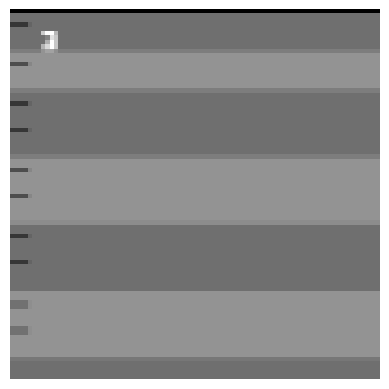

In [6]:
plt.imshow(pros,cmap='gray')
plt.axis("off")
plt.show()

In [7]:
def modl(input_shape, num_actions):
    model= Sequential([
        Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=input_shape),
        Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
        Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_actions, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

In [8]:
class DQNAgent:
    def __init__(self, action_size):
        self.memory = deque(maxlen=100000)
        self.action_size = action_size
        self.model = modl((84, 84, 1), action_size)
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_min = 0.1
        self.epsilon_decay = 0.995
    def act(self, state):
        if np.random.rand()<=self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.model.predict(state[np.newaxis, :, :, np.newaxis], verbose=0)
        return np.argmax(q_values[0])
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    def replay(self, batch_size=32):
        minibatch =random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target =reward
            if not done:
                next_q=np.max(self.model.predict(next_state[np.newaxis, :, :, np.newaxis], verbose=0)[0])
                target=reward+self.gamma*next_q
            q_values = self.model.predict(state[np.newaxis, :, :, np.newaxis], verbose=0)
            q_values[0][action] = target
            self.model.fit(state[np.newaxis, :, :, np.newaxis], q_values, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [9]:
env = gym.make("ALE/Casino-v5", render_mode="rgb_array", mode=2)
agent=DQNAgent(env.action_space.n)
bf=[]
br=0
be=0
episodes = 4000
for e in range(episodes):
    obs, _ = env.reset()
    env.step(env.action_space.sample())
    frame = screenshot
    state = pros
    total_reward = 0
    done=False
    fram=[]
    while not done:
        action = agent.act(state)
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        fram.append(env.render())
        next_state = pros
        fram.append(screenshot)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done:
            print(f"Episode {e+1}: {total_reward}")
            if total_reward>br:
                br=total_reward
                bf=fram
            break
    if len(agent.memory) > 1000:
        agent.replay(32)
env.close()

C:\Users\jforesoii\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Episode 1: -990.0
Episode 2: 4400.0
Episode 3: 5800.0
Episode 4: -990.0
Episode 5: 3000.0
Episode 6: 2600.0
Episode 7: 2600.0
Episode 8: -990.0
Episode 9: -990.0
Episode 10: -990.0
Episode 11: -990.0
Episode 12: -990.0
Episode 13: -990.0
Episode 14: -990.0
Episode 15: -990.0
Episode 16: -990.0
Episode 17: -990.0
Episode 18: -990.0
Episode 19: -990.0
Episode 20: -990.0
Episode 21: -990.0
Episode 22: -990.0
Episode 23: -990.0
Episode 24: -990.0
Episode 25: -990.0
Episode 26: 800.0
Episode 27: -990.0
Episode 28: -990.0
Episode 29: -990.0
Episode 30: 2200.0
Episode 31: -990.0
Episode 32: 3600.0
Episode 33: -990.0
Episode 34: -990.0
Episode 35: -990.0
Episode 36: -990.0
Episode 37: 3000.0
Episode 38: -990.0
Episode 39: -990.0
Episode 40: -990.0
Episode 41: -990.0
Episode 42: -990.0
Episode 43: -990.0
Episode 44: -990.0
Episode 45: -990.0
Episode 46: 4200.0
Episode 47: -990.0
Episode 48: 600.0
Episode 49: -990.0
Episode 50: -990.0
Episode 51: 2600.0
Episode 52: 2400.0
Episode 53: -990.0
Epis

Episode 418: -990.0
Episode 419: -990.0
Episode 420: -400.0
Episode 421: -990.0
Episode 422: -990.0
Episode 423: -990.0
Episode 424: -990.0
Episode 425: -990.0
Episode 426: -990.0
Episode 427: -990.0
Episode 428: -990.0
Episode 429: -990.0
Episode 430: -990.0
Episode 431: -990.0
Episode 432: 600.0
Episode 433: -990.0
Episode 434: -990.0
Episode 435: 1650.0
Episode 436: 1800.0
Episode 437: 1600.0
Episode 438: -990.0
Episode 439: 2000.0
Episode 440: -990.0
Episode 441: 200.0
Episode 442: 200.0
Episode 443: 600.0
Episode 444: 1000.0
Episode 445: -990.0
Episode 446: 3600.0
Episode 447: -990.0
Episode 448: -990.0
Episode 449: -990.0
Episode 450: -990.0
Episode 451: -990.0
Episode 452: 600.0
Episode 453: -990.0
Episode 454: -990.0
Episode 455: 600.0
Episode 456: -990.0
Episode 457: -990.0
Episode 458: 2400.0
Episode 459: 2000.0
Episode 460: -990.0
Episode 461: 2200.0
Episode 462: -990.0
Episode 463: -990.0
Episode 464: -990.0
Episode 465: -990.0
Episode 466: -990.0
Episode 467: -990.0
Episod

KeyboardInterrupt: 

In [10]:
agent.model.save("model.h5")


In [ ]:
def play():
    env = gym.make("ALE/Casino-v5", render_mode="human", mode=2)
    state, _ = env.reset()
    state = gary(state)
    state = np.expand_dims(state, axis=-1)  # Add channel dimension
    state = np.expand_dims(state, axis=0)   # Add batch dimension
    
    total_reward = 0
    while True:
        # Get Q-values and choose best action
        q_values = model.predict(state, verbose=0)
        action = np.argmax(q_values[0])
        
        # Take action
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        
        # Prepare next state
        next_state = gary(next_state)
        next_state = np.expand_dims(next_state, axis=-1)
        next_state = np.expand_dims(next_state, axis=0)
        
        state = next_state
        total_reward += reward
        
        if done:
            print(f"Game Over! Total reward: {total_reward}")
            break
            
    env.close()

# Run the game
if __name__ == "__main__":
    play()